### ImageNet
1) Imagenet is an image database that organizes a competition for image classfication. <br>
2) Imagenet provides the CNN model weight and based on those weights custom pretrained models are developed<br>
3) Using custom pre-trained models in CNN is referred to as using Transfer Learning Techniques<br>
4) VGG16, VGG19, ResNet,ResNet50, MobileNet, Inception etc. are exmaples of Transfer learning Techniques
These are custom CNN architectures used to implement image clasification

### VGG16
1) It uses Convolution with (3,3) filters with a stride of 1 and uses the 'same' padding with 
maxpool layer throughout the architecture<br>
2) In the end it has three fully connected layers followed by a softmax activation for output<br>

#### VGG16 Architecture
![](vgg16_arch.jpeg)
<!-- <img src="E:\Projects\AI_Smartknower\ImageNet\vgg16_arch.jpeg"> -->

#### Dataset -> https://www.kaggle.com/datasets/puneet6060/intel-image-classification

#### Data Augmentation Visualization

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

<br><br>

### Fruit Image Classification using VGG16 and Data Augmentation

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import random

In [163]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.applications.mobilenet import preprocess_input

In [164]:
img_shape = (300,300)
BATCH_SIZE = 16

In [165]:
# E:\Img_datasets\Intel_Image\seg_train
# train_dir = "E:\\Img_datasets\\Intel_Image\\seg_train"
# test_dir = "E:\\Img_datasets\\Intel_Image\\seg_test"
train_dir = "E:\Projects\AI_Smartknower\ImageNet\Dataset\seg_train"
test_dir = "E:\Projects\AI_Smartknower\ImageNet\Dataset\seg_test"

### Data Augmentation

In [166]:
total = 2191 + 2271 + 2404 + 2512 + 2274 + 2382
print(total)
print(total*0.01)

14034
140.34


In [167]:
train_gen = ImageDataGenerator(
            rotation_range=20,horizontal_flip=True,vertical_flip=True,
            width_shift_range=0.2,height_shift_range=0.2,
            preprocessing_function=preprocess_input,
            zoom_range=0.2,shear_range=0.3,validation_split=0.98)


train = train_gen.flow_from_directory(train_dir,target_size=img_shape,shuffle=True,
        class_mode='categorical',batch_size=BATCH_SIZE,subset='training')

Found 284 images belonging to 6 classes.


In [168]:
total_test = 437 + 474 + 553 + 525 + 510 + 501
print(total_test)

3000


In [169]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.02)

test = test_gen.flow_from_directory(test_dir,target_size=img_shape,shuffle=False,
        class_mode='categorical',batch_size=BATCH_SIZE,subset='validation')

Found 58 images belonging to 6 classes.


In [170]:
train_samples = train.samples
test_samples = test.samples
print(train_samples)
print(test_samples)

284
58


In [171]:
classes = list(train.class_indices.keys())
print(train.class_indices)  # dict
print('Classes',classes)
num_classes = len(classes)
print(num_classes)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Classes ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
6


In [172]:
print(train.class_indices.values())

dict_values([0, 1, 2, 3, 4, 5])


In [173]:
print(train.labels)
print(len(train.labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
284


In [174]:
print(test.labels)
print(len(test.labels))

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5]
58


#### Displaying augmented images

In [175]:
# it = datagen.flow_from_directory(samples, batch_size=1)
# for i in range(9):
#     plt.subplot(330 + 1 + i)
#     batch = train.next()
#     image = batch[0].astype('uint8')
#     plt.imshow(image)
# plt.show()

### Build The VGG16 Model

In [176]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

#### Import Saved weights from Imagenet for VGG16 model

In [177]:
vgg16m = VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3)) # inclue_top is false dont want to include top 3 layer given above figure (dense layer)
vgg16m.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [178]:
m1 = Sequential()
vgg16m.trainable = False
m1.add(vgg16m)
m1.add(GlobalAveragePooling2D())

m1.add(Dense(128,activation='relu'))
m1.add(BatchNormalization())  # prevention of overfitting
m1.add(Dropout(0.2))
m1.add(Dense(6,activation='softmax'))   # output layer

m1.compile(optimizer=Adam(beta_1=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

In [179]:
# Train = 246, Test = 58
h1 = m1.fit(train,validation_data=test,epochs=20 )
# epochs = no of iterations

Epoch 1/20
18/18 [==============================] - 180s 10s/step - loss: 1.8157 - accuracy: 0.3592 - val_loss: 1.6471 - val_accuracy: 0.5172
Epoch 2/20
18/18 [==============================] - 180s 10s/step - loss: 0.7912 - accuracy: 0.6866 - val_loss: 0.8264 - val_accuracy: 0.7241
Epoch 3/20
18/18 [==============================] - 177s 10s/step - loss: 0.5806 - accuracy: 0.7711 - val_loss: 0.7046 - val_accuracy: 0.7931
Epoch 4/20
18/18 [==============================] - 178s 10s/step - loss: 0.4308 - accuracy: 0.8310 - val_loss: 0.6425 - val_accuracy: 0.7759
Epoch 5/20
18/18 [==============================] - 177s 10s/step - loss: 0.4723 - accuracy: 0.8345 - val_loss: 0.6309 - val_accuracy: 0.8276
Epoch 6/20
18/18 [==============================] - 176s 10s/step - loss: 0.4157 - accuracy: 0.8627 - val_loss: 0.6637 - val_accuracy: 0.8103
Epoch 7/20
18/18 [==============================] - 175s 10s/step - loss: 0.3791 - accuracy: 0.8521 - val_loss: 0.5166 - val_accuracy: 0.8621
Epoch 

In [180]:
r1 = pd.DataFrame(h1.history)
r1['Epcohs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epcohs
15,0.253346,0.915493,0.461132,0.862069,15
16,0.253092,0.919014,0.553448,0.827586,16
17,0.209043,0.919014,0.650702,0.810345,17
18,0.175619,0.933099,0.740766,0.827586,18
19,0.202708,0.922535,0.688076,0.810345,19


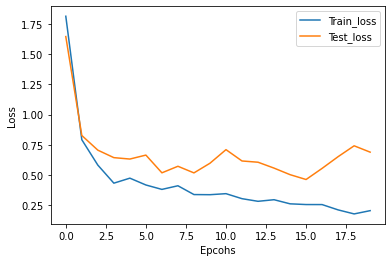

In [181]:
plt.plot(r1['Epcohs'],r1['loss'],label='Train_loss')
plt.plot(r1['Epcohs'],r1['val_loss'],label='Test_loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend()
plt.show()

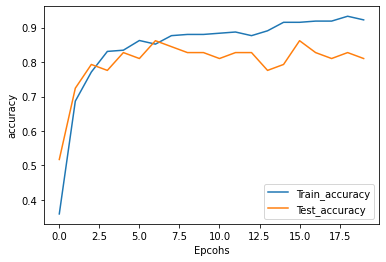

In [182]:
plt.plot(r1['Epcohs'],r1['accuracy'],label='Train_accuracy')
plt.plot(r1['Epcohs'],r1['val_accuracy'],label='Test_accuracy')
plt.xlabel('Epcohs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [183]:
ypred = m1.predict(test)
print(ypred)

4/4 [==============================] - 28s 7s/step
[[9.99785602e-01 1.33075901e-06 3.17122215e-07 6.28689975e-07
  1.99373768e-04 1.27780577e-05]
 [8.21120441e-01 9.20655497e-04 1.30769558e-06 3.20276536e-06
  1.06041398e-06 1.77953392e-01]
 [9.99989510e-01 1.80772543e-06 2.69851275e-09 1.38024518e-07
  4.24552638e-07 8.18438457e-06]
 [9.98879015e-01 3.25363435e-05 4.27554482e-07 1.61469143e-06
  2.89497257e-06 1.08337821e-03]
 [9.99998331e-01 1.69260055e-08 1.97575312e-09 4.98660713e-09
  1.60337356e-06 1.89383744e-08]
 [7.17750117e-02 1.50646241e-02 1.01849847e-02 7.58389950e-01
  1.42282352e-01 2.30305386e-03]
 [9.99806821e-01 3.89665911e-05 4.48426754e-08 7.37164783e-07
  4.59922012e-06 1.48870487e-04]
 [9.59938765e-01 1.98929626e-02 2.34257037e-04 1.43916055e-03
  1.00038640e-04 1.83948334e-02]
 [5.62048117e-05 9.97992992e-01 1.96530993e-04 1.06829277e-03
  9.22383624e-05 5.93799981e-04]
 [2.60980846e-06 9.97679412e-01 1.74795699e-04 6.86100839e-06
  1.23820573e-05 2.12389533e-03]

In [184]:
ypred = [np.argmax(i) for i in ypred]
print(ypred)

[0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 5, 0, 5, 5, 5, 0, 0, 5, 5, 0]


In [185]:
from io import StringIO, BytesIO
from Bio import SeqIO
from tokenize import String
from tabulate import tabulate

res1 = pd.DataFrame({'y_test':test.labels,'y_pred':[*ypred]})
# for i in res1:
    # print(list(res1[i]))
    # print((res1[i]))
res1.tail
# res1.tail()

<bound method NDFrame.tail of     y_test  y_pred
0        0       0
1        0       0
2        0       0
3        0       0
4        0       0
5        0       3
6        0       0
7        0       0
8        1       1
9        1       1
10       1       1
11       1       1
12       1       1
13       1       1
14       1       1
15       1       1
16       1       1
17       2       2
18       2       2
19       2       2
20       2       3
21       2       3
22       2       2
23       2       2
24       2       3
25       2       2
26       2       2
27       2       2
28       3       3
29       3       3
30       3       3
31       3       3
32       3       2
33       3       3
34       3       2
35       3       3
36       3       3
37       3       3
38       4       4
39       4       1
40       4       4
41       4       4
42       4       4
43       4       4
44       4       4
45       4       4
46       4       4
47       4       4
48       5       5
49       5       0
5

In [186]:
from sklearn.metrics import confusion_matrix,classification_report

In [187]:
cm = confusion_matrix(test.labels,ypred)
print(cm)
print(classification_report(test.labels,ypred))

[[7 0 0 1 0 0]
 [0 9 0 0 0 0]
 [0 0 8 3 0 0]
 [0 0 2 8 0 0]
 [0 1 0 0 9 0]
 [4 0 0 0 0 6]]
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.90      1.00      0.95         9
           2       0.80      0.73      0.76        11
           3       0.67      0.80      0.73        10
           4       1.00      0.90      0.95        10
           5       1.00      0.60      0.75        10

    accuracy                           0.81        58
   macro avg       0.83      0.82      0.81        58
weighted avg       0.84      0.81      0.81        58



### MobileNet

<img src="mobilenet_arch.png">

### Major Project
Implement the Intel Image project using MobileNet Transfer learning technique

Link Used -> https://www.tensorflow.org/api_docs/python/tf/keras/applications/

Dataset -> https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [188]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

### Mount Drive on Colab

In [189]:
# from google.colab import drive
# drive.mount('/content/drive')

# df  = pd.read_csv('/content/drive/My Drive/Colab_files/house_price2.csv')
# df.head()